In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/home/admin1/Tensorflow/Churn_Modelling.csv')

In [3]:
data.shape

(10000, 14)

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
len(data['RowNumber'].unique()), len(data['CustomerId'].unique()), len(data['Surname'].unique())

(10000, 10000, 2932)

In [6]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [7]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


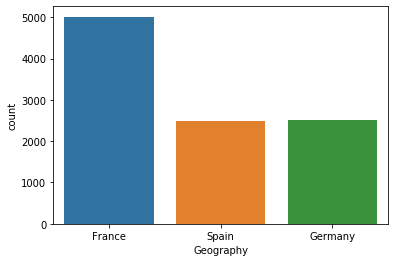

In [8]:
sb.countplot(data['Geography'])
plt.show()

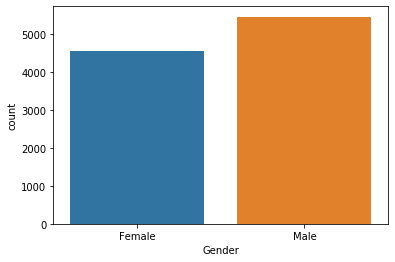

In [9]:
sb.countplot(data['Gender'])
plt.show()

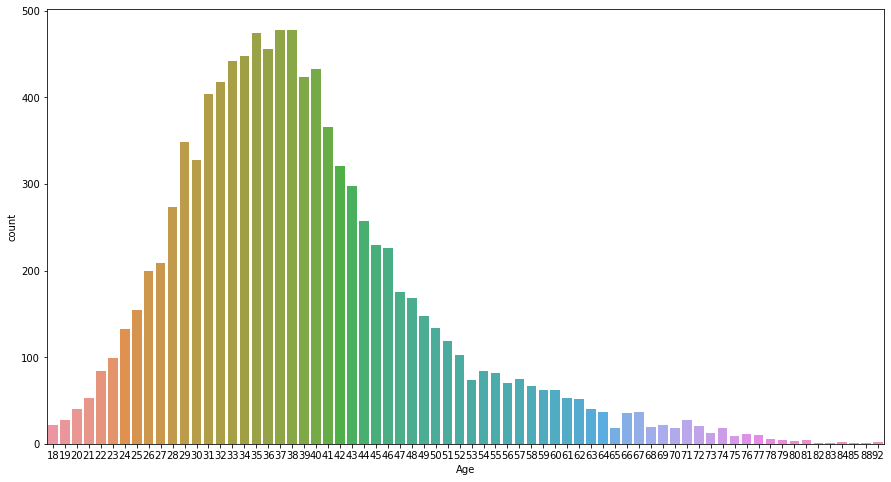

In [10]:
fig, ax = plt.subplots(figsize = (15, 8))
sb.countplot(data['Age'])
plt.show()

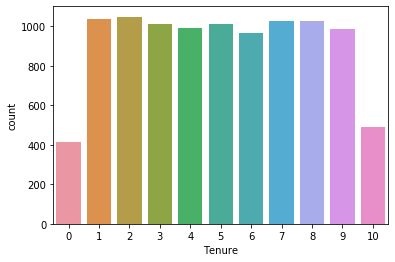

In [11]:
sb.countplot(data['Tenure'])
plt.show()

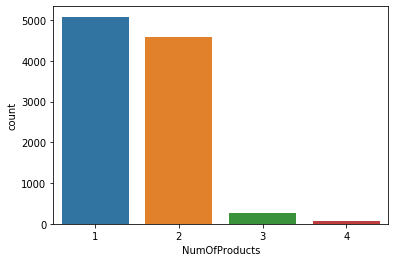

In [12]:
sb.countplot(data['NumOfProducts'])
plt.show()

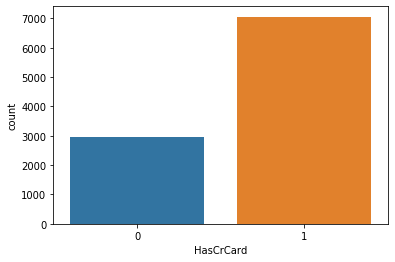

In [13]:
sb.countplot(data['HasCrCard'])
plt.show()

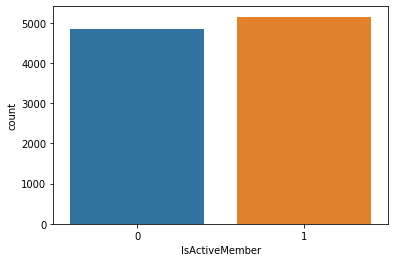

In [14]:
sb.countplot(data['IsActiveMember'])
plt.show()

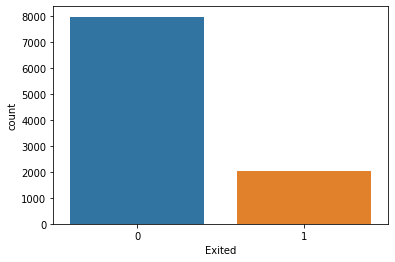

In [15]:
sb.countplot(data['Exited'])
plt.show()

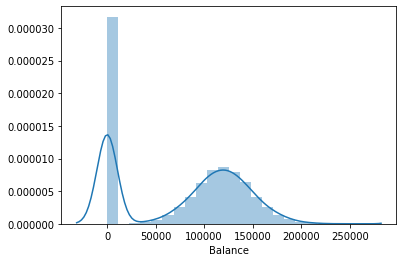

In [16]:
sb.distplot(data['Balance'])
plt.show()

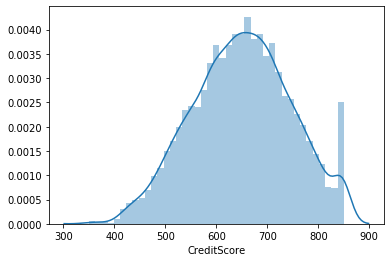

In [17]:
sb.distplot(data['CreditScore'])
plt.show()

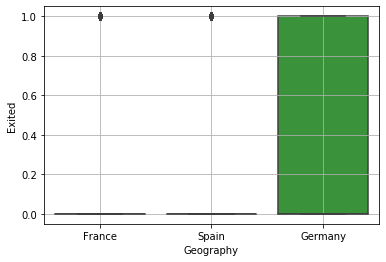

In [18]:
sb.boxplot(x = 'Geography', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

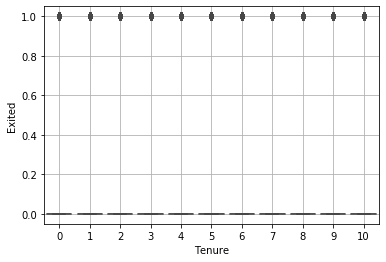

In [19]:
sb.boxplot(x = 'Tenure', 
           y = 'Exited', 
           data = data)
plt.grid()
plt.show()

In [20]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Preprocessing

In [21]:
sc = StandardScaler()
data.iloc[:, [0, 3, 4, 5, 6, 7, 8, 9]] = sc.fit_transform(data.iloc[:, [0, 3, 4, 5, 6, 7, 8, 9]])

In [22]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-0.326221,France,Female,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1
1,-0.440036,Spain,Female,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0
2,-1.536794,France,Female,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1
3,0.501521,France,Female,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,0
4,2.063884,Spain,Female,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0


In [23]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1:].values

In [24]:
X[0]

array([-0.3262214220367463, 'France', 'Female', 0.2935174228967471,
       -1.0417596792253108, -1.2258476714090278, -0.9115834940401767,
       0.646091668153197, 0.9702425509371355, 0.021886493995386117],
      dtype=object)

In [25]:
label1 = LabelEncoder()
X[:, 1] = label1.fit_transform(X[:, 1])

label2 = LabelEncoder()
X[:, 2] = label2.fit_transform(X[:, 2])

In [26]:
X[0]

array([-0.3262214220367463, 0, 0, 0.2935174228967471, -1.0417596792253108,
       -1.2258476714090278, -0.9115834940401767, 0.646091668153197,
       0.9702425509371355, 0.021886493995386117], dtype=object)

In [27]:
ohe = OneHotEncoder(categorical_features = [1])
X = ohe.fit_transform(X).toarray()

In [28]:
X[0]

array([ 1.        ,  0.        ,  0.        , -0.32622142,  0.        ,
        0.29351742, -1.04175968, -1.22584767, -0.91158349,  0.64609167,
        0.97024255,  0.02188649])

In [29]:
X = X[:, 1:]

In [30]:
X[0]

array([ 0.        ,  0.        , -0.32622142,  0.        ,  0.29351742,
       -1.04175968, -1.22584767, -0.91158349,  0.64609167,  0.97024255,
        0.02188649])

In [31]:
X.shape

(10000, 11)

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [33]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8000, 11), (8000, 1), (2000, 11), (2000, 1))

# Initialising ANN

In [34]:
model = tf.keras.Sequential()

# Adding the 1st Hidden Layer 

In [35]:
model.add(tf.keras.layers.Dense(units = 6, 
                activation = 'relu',  
                kernel_initializer = 'normal',
                bias_initializer = 'zeros',
                input_dim = x_train.shape[1]))

# Adding the 2nd Hidden Layer

In [36]:
model.add(tf.keras.layers.Dense(units = 8, 
                activation = 'relu', 
                kernel_initializer = 'normal',
               bias_initializer = 'zeros'))

# Adding the Output Layer

In [37]:
model.add(tf.keras.layers.Dense(units = 1,
               activation = 'sigmoid',
               kernel_initializer = 'uniform',
               bias_initializer = 'zeros'))

# Compiling the Artificial Neural network

In [38]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set

In [39]:
tensorboard = TensorBoard(log_dir = '/home/admin1/Tensorflow/graph/churn_graph', 
                          histogram_freq = 0,
                          write_graph = False, 
                          write_images = False)

In [40]:
model.fit(x_train, 
          y_train, 
          batch_size = 30, 
          nb_epoch = 100,
         callbacks=[tensorboard])

Train on 8000 samples
Epoch 1/100
8000/8000 [==============================] - 2s 194us/sample - loss: 0.5536 - accuracy: 0.7945
Epoch 2/100
8000/8000 [==============================] - 1s 64us/sample - loss: 0.4376 - accuracy: 0.7962
Epoch 3/100
8000/8000 [==============================] - 1s 71us/sample - loss: 0.4288 - accuracy: 0.7962
Epoch 4/100
8000/8000 [==============================] - 1s 71us/sample - loss: 0.4232 - accuracy: 0.7996
Epoch 5/100
8000/8000 [==============================] - 1s 73us/sample - loss: 0.4185 - accuracy: 0.8232
Epoch 6/100
8000/8000 [==============================] - 1s 72us/sample - loss: 0.4136 - accuracy: 0.8314
Epoch 7/100
8000/8000 [==============================] - 1s 73us/sample - loss: 0.4096 - accuracy: 0.8338
Epoch 8/100
8000/8000 [==============================] - 1s 97us/sample - loss: 0.4066 - accuracy: 0.8353
Epoch 9/100
8000/8000 [==============================] - 1s 78us/sample - loss: 0.4047 - accuracy: 0.8354
Epoch 10/100
8000/8000 

8000/8000 [==============================] - 1s 75us/sample - loss: 0.3912 - accuracy: 0.8399
Epoch 77/100
8000/8000 [==============================] - 1s 76us/sample - loss: 0.3915 - accuracy: 0.8382
Epoch 78/100
8000/8000 [==============================] - 1s 103us/sample - loss: 0.3912 - accuracy: 0.8393
Epoch 79/100
8000/8000 [==============================] - 1s 70us/sample - loss: 0.3914 - accuracy: 0.8386
Epoch 80/100
8000/8000 [==============================] - 1s 72us/sample - loss: 0.3914 - accuracy: 0.8395
Epoch 81/100
8000/8000 [==============================] - 1s 79us/sample - loss: 0.3916 - accuracy: 0.8391
Epoch 82/100
8000/8000 [==============================] - 1s 69us/sample - loss: 0.3914 - accuracy: 0.8395
Epoch 83/100
8000/8000 [==============================] - 1s 69us/sample - loss: 0.3914 - accuracy: 0.8405
Epoch 84/100
8000/8000 [==============================] - 1s 72us/sample - loss: 0.3913 - accuracy: 0.8397
Epoch 85/100
8000/8000 [=========================

# Predicting the test dataset 

In [41]:
y_pred = model.predict_classes(x_test)

In [42]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

# Evaluating the test dataset 

In [43]:
model.evaluate(x_test, y_test)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.40404234981536863, 0.8365]

In [44]:
confusion_matrix(y_test, y_pred)

array([[1547,   46],
       [ 281,  126]])

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90      1593
           1       0.73      0.31      0.44       407

    accuracy                           0.84      2000
   macro avg       0.79      0.64      0.67      2000
weighted avg       0.82      0.84      0.81      2000

